In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://www.dropbox.com/s/zfa1vkucc093wj4/epi_r.csv?dl=1')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon app\xc3\xa9tit',
 'bon app\xef\xbf\xbd\xef\xbf\xbdtit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


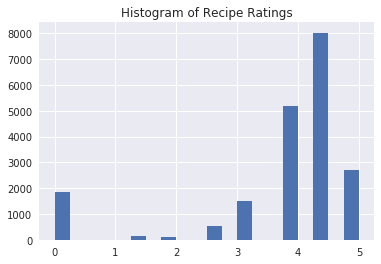

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

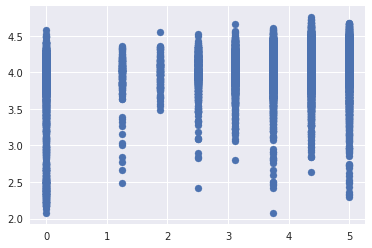

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

0.03856570651298896

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and **clean up our feature set. There might be some gains to be made by getting rid of the noise.**

We could also see how **removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.**

Lastly, we could **take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values. ** 

And that is your challenge.

**Transform this regression problem into a binary classifier and clean up the feature set**. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [26]:
#remove our null values
raw_data.dropna(inplace=True)

In [27]:
#check value counts
raw_data['rating'].value_counts()

4.375    6552
3.750    4136
5.000    2106
0.000    1296
3.125    1165
2.500     405
1.250     123
1.875      81
Name: rating, dtype: int64

In [35]:
#create binary rating  
raw_data['rating_bi'] = np.where(raw_data['rating']>=4.0,1,0)
Y = raw_data.rating_bi
X = raw_data.drop(['rating', 'rating_bi','title'],1)

In [36]:
#import and use K best f test to select top 30 features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature_select = SelectKBest(f_classif, k=30)
feature_select.fit(X,Y)

SelectKBest(k=30, score_func=<function f_classif at 0x7f4a770089b0>)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [38]:
#import and fit model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
cross_val_score(svc, X_test, y_test, cv=5)

array([0.54354669, 0.55987395, 0.52941176, 0.5262605 , 0.54784437])

Looks like selecting the top 30 features,filtering out the null values, and changing the model to binary helped increase the models accuracy prediction